In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# ***Connectivity in undirected graphs***

### ***A connected component is a subset of nodes where every node in the subset has a path to every other node in the subset and no other node outside this subset has a path to any node in the subset. (a secular subset of nodes)***

In [111]:
def generate_unique_pairs(container: list[str], ignore: list[tuple[str, str]] = None) -> list[str]:
    if ignore == None:
        ignore = list()
    upairs = list()
    for (a, b) in itertools.permutations(container, 2):
        if ((b, a) not in upairs) & ((a, b) not in ignore) & ((b, a) not in ignore):
            upairs.append((a, b))
    return upairs

In [112]:
generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")])

[('A', 'B'),
 ('A', 'C'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'E')]

In [113]:
generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")])

[('F', 'G'),
 ('F', 'I'),
 ('G', 'H'),
 ('G', 'I'),
 ('G', 'J'),
 ('H', 'I'),
 ('H', 'J'),
 ('I', 'J')]

In [114]:
generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")])

[('K', 'L'),
 ('K', 'M'),
 ('K', 'O'),
 ('L', 'M'),
 ('L', 'N'),
 ('L', 'O'),
 ('M', 'O'),
 ('N', 'O')]

In [36]:
edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")])

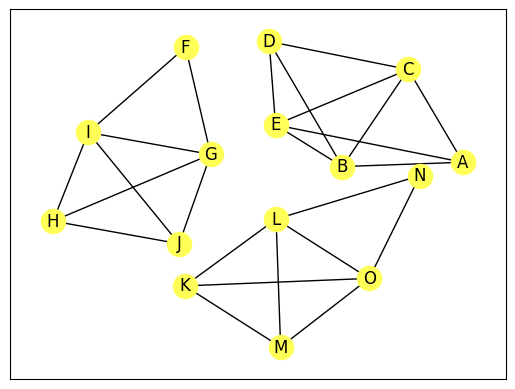

In [86]:
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(graph, scale = 10)
nx.draw_networkx(graph, node_color = "#FFFF57", pos = pos)

In [87]:
# is {A, E, F , G} a connected component? No.A and E cannot reach F or G
# {N, O, K} a connected componeent? No. N, O & K can reach one another but they can also be accessed by other nodes!

In [88]:
# number of connected components

nx.number_connected_components(graph)

3

In [91]:
# connected components in a network

list(nx.connected_components(graph))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [94]:
# to learn which connecetd component a node belongs to

nx.node_connected_component(graph, "A")

{'A', 'B', 'C', 'D', 'E'}

# ***Connectivity in directed graphs***

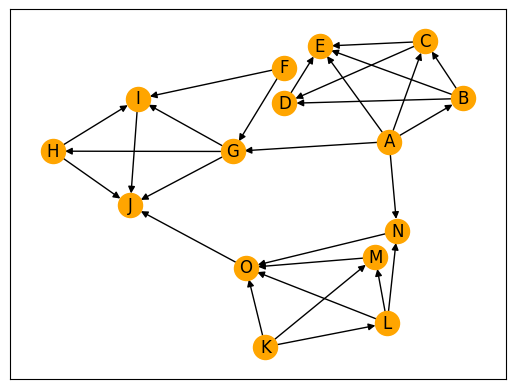

In [107]:
digraph = nx.DiGraph()
edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")]) + [("A", "G"), ("A", "N"), ("O", "J")]
digraph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(digraph)
nx.draw_networkx(digraph, pos = pos, node_color = "orange")

In [108]:
# there are two types of connectivity in directed graphs
# strongly connected
# weakly connected

# a directed graph is said to be strongly connected when there is a directed pair of paths for every pair of nodes.
# e.g. A -> B and B -> A

# a directed graph is daid to be weakly connceted when every node will at least one edge once the edge directions are dropped.
# here the directions are not considered.

In [109]:
nx.is_strongly_connected(digraph)

False

In [110]:
nx.is_weakly_connected(digraph)

True

## ***Connected components in directed graphs***

In [116]:
# strongly connected component 
# a subset of nodes where every node is connected to every other node by a directed path and
# no outside node has a directed path to or from a node in the subset.

list(nx.strongly_connected_components(digraph))

[{'E'},
 {'D'},
 {'C'},
 {'B'},
 {'J'},
 {'I'},
 {'H'},
 {'G'},
 {'O'},
 {'N'},
 {'A'},
 {'F'},
 {'M'},
 {'L'},
 {'K'}]

In [120]:
# weakly connected components are the connected components after removing the directions from all the edges
# here, the whole network makes up one weakly connected component!

list(nx.weakly_connected_components(digraph))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]